In [1]:
from random import seed
# fixar a semente para que os resultados sejam repetíveis
seed(42)

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor

## 1. Faça a análise descritiva dos dados e o tratamento dos dados.

In [5]:
# Carregando o conjunto de dados copacabana delimitrando por `;`
copacabana = pd.read_csv('copacabana.csv', delimiter=';')

In [17]:
# Retornando as colunas do dataframe com as primeiras linhas de dados
copacabana.head()

Posicao Quartos Vagas  DistIpanema  DistPraia  DistFavela  RendaMedia  \
0       1     3.0  0.01       1144.0      311.0       146.0    969501.0   
1       0     2.0  0.01       2456.0      502.0       254.0   1472861.0   
2       0     2.0  0.01       2448.0      772.0       229.0   1803724.0   
3       0     2.0  0.01       1615.0      428.0       310.0   1124331.0   
4       0     2.0  1.00       2358.0      586.0       287.0   1165764.0   

   RendaMovel  RendaMovelRua  Vu2009  Mes  Idade Tipologia  AreaConstruida  \
0   1028834.0       999168.0  1750.0  509   37.0         1            95.0   
1   1137759.0      1305310.0  2300.0  484   30.0         1            71.0   
2   1512475.0      1658100.0  2350.0  920   44.0         1            58.0   
3   1370600.0      1247466.0  2200.0  930   43.0         1            88.0   
4   1177933.0      1171849.0  2150.0  918   42.0         1            68.0   

   VAL_UNIT            X            Y  
0    4379.0  685365.0700  7457802.680  
1    6479.0  685941.5500  7459001.320  
2   12414.0  685627.3900  7459080.520  
3   11250.0  685438.2001  7458268.280  
4   13382.0  685764.3840  7458954.513

In [8]:
#Verificar se existem anotações nulas comparando o copacabana_limpo (sem nan) com o copacabana principal
copacabana_limpo = copacabana.dropna()
print('Qtde de linhas com anotação nula: %d' %(copacabana.shape[0]-copacabana_limpo.shape[0]))

Qtde de linhas com anotação nula: 0


In [10]:
# Obtendo as informações sobre os tipos dos dados das colunas
copacabana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 17 columns):
Posicao           1675 non-null int64
Quartos           1675 non-null float64
Vagas             1675 non-null float64
DistIpanema       1675 non-null int64
DistPraia         1675 non-null int64
DistFavela        1675 non-null int64
RendaMedia        1675 non-null int64
RendaMovel        1675 non-null int64
RendaMovelRua     1675 non-null int64
Vu2009            1675 non-null int64
Mes               1675 non-null int64
Idade             1675 non-null float64
Tipologia         1675 non-null int64
AreaConstruida    1675 non-null int64
VAL_UNIT          1675 non-null int64
X                 1675 non-null float64
Y                 1675 non-null float64
dtypes: float64(5), int64(12)
memory usage: 222.5 KB


In [15]:
# Após à análise dos dados, faz-se a tranformação das colunas para categóricos e númericos
copacabana[['DistIpanema','DistPraia','DistFavela','RendaMedia','RendaMovel','RendaMovelRua','Vu2009','AreaConstruida','VAL_UNIT']]=copacabana[['DistIpanema','DistPraia','DistFavela','RendaMedia','RendaMovel','RendaMovelRua','Vu2009','AreaConstruida','VAL_UNIT']].astype(np.float64) 
copacabana[['Quartos','Tipologia','Vagas','Mes','Posicao']]=copacabana[['Quartos','Tipologia','Vagas','Mes','Posicao']].astype('category') 
copacabana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 17 columns):
Posicao           1675 non-null category
Quartos           1675 non-null category
Vagas             1675 non-null category
DistIpanema       1675 non-null float64
DistPraia         1675 non-null float64
DistFavela        1675 non-null float64
RendaMedia        1675 non-null float64
RendaMovel        1675 non-null float64
RendaMovelRua     1675 non-null float64
Vu2009            1675 non-null float64
Mes               1675 non-null category
Idade             1675 non-null float64
Tipologia         1675 non-null category
AreaConstruida    1675 non-null float64
VAL_UNIT          1675 non-null float64
X                 1675 non-null float64
Y                 1675 non-null float64
dtypes: category(5), float64(12)
memory usage: 166.9 KB


In [16]:
# Conhecer o conjunto de dados númericos (note que os dados categoricos não aparecem)
copacabana.describe()

DistIpanema    DistPraia   DistFavela    RendaMedia    RendaMovel  \
count  1675.000000  1675.000000  1675.000000  1.675000e+03  1.675000e+03   
mean   2112.444179   353.662687   405.623284  1.232577e+06  1.214159e+06   
std     909.254397   241.712897   215.175421  2.454474e+05  3.502902e+05   
min     337.000000    31.000000    15.000000  4.982560e+05  4.426680e+05   
25%    1414.000000   179.000000   226.500000  1.083455e+06  1.000877e+06   
50%    2259.000000   318.000000   403.000000  1.165764e+06  1.175438e+06   
75%    2805.500000   462.500000   576.500000  1.395924e+06  1.398392e+06   
max    3611.000000  1242.000000   851.000000  2.068724e+06  2.922751e+06   

       RendaMovelRua       Vu2009        Idade  AreaConstruida      VAL_UNIT  \
count   1.675000e+03  1675.000000  1675.000000     1675.000000   1675.000000   
mean    1.223369e+06  2249.367164    50.036442       78.880597   8084.660896   
std     2.718984e+05   518.861409    11.611873       59.504466   3742.027190   
min     4.982560e+05   780.000000     0.010000       15.000000   2037.000000   
25%     1.044084e+06  2000.000000    44.000000       38.000000   5000.000000   
50%     1.187842e+06  2200.000000    53.000000       63.000000   7212.000000   
75%     1.360872e+06  2500.000000    57.000000       98.500000  10606.000000   
max     2.223676e+06  4100.000000    75.000000      668.000000  24490.000000   

                   X             Y  
count    1675.000000  1.675000e+03  
mean   685980.624667  7.458579e+06  
std       630.889668  7.564990e+02  
min    685024.810000  7.456842e+06  
25%    685472.150000  7.458048e+06  
50%    685792.470000  7.458776e+06  
75%    686490.585000  7.459228e+06  
max    687253.719900  7.459698e+06

/Users/rodrigosantos/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rodrigosantos/Library/Python/3.7/lib/python/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


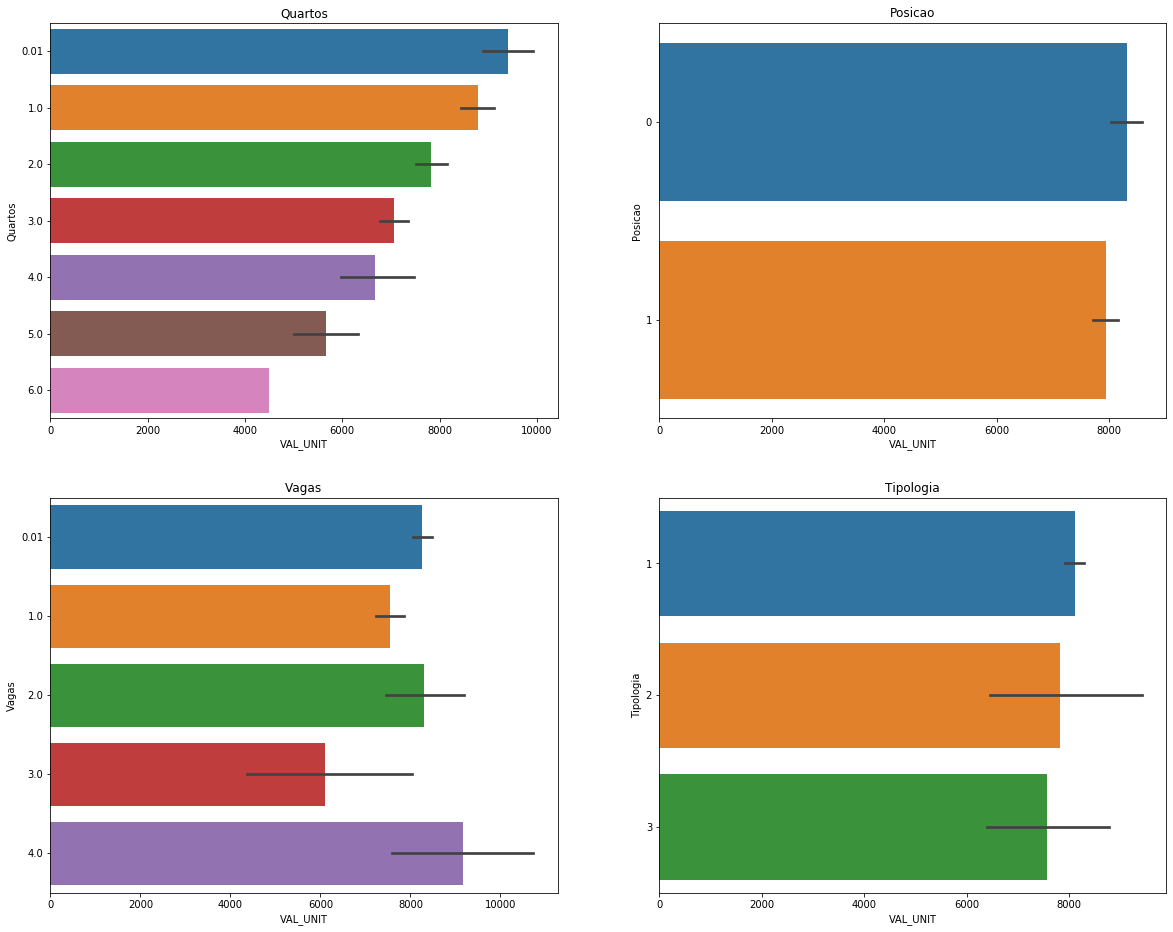

In [21]:
# Note que as variaveis Quartos e Vagas são as que mais variam para o valor unitario
plt.figure(figsize=(20, 16))
ax=plt.subplot(221)
sns.barplot(x='VAL_UNIT', y='Quartos', data=copacabana, orient=1)
plt.title('Quartos')
ax=plt.subplot(222)
sns.barplot(x='VAL_UNIT', y='Posicao', data=copacabana, orient=1)
plt.title('Posicao')
ax=plt.subplot(223)
sns.barplot(x='VAL_UNIT', y='Vagas', data=copacabana, orient=1)
plt.title('Vagas')
ax=plt.subplot(224)
sns.barplot(x='VAL_UNIT', y='Tipologia', data=copacabana, orient=1)
plt.title('Tipologia')
plt.show()

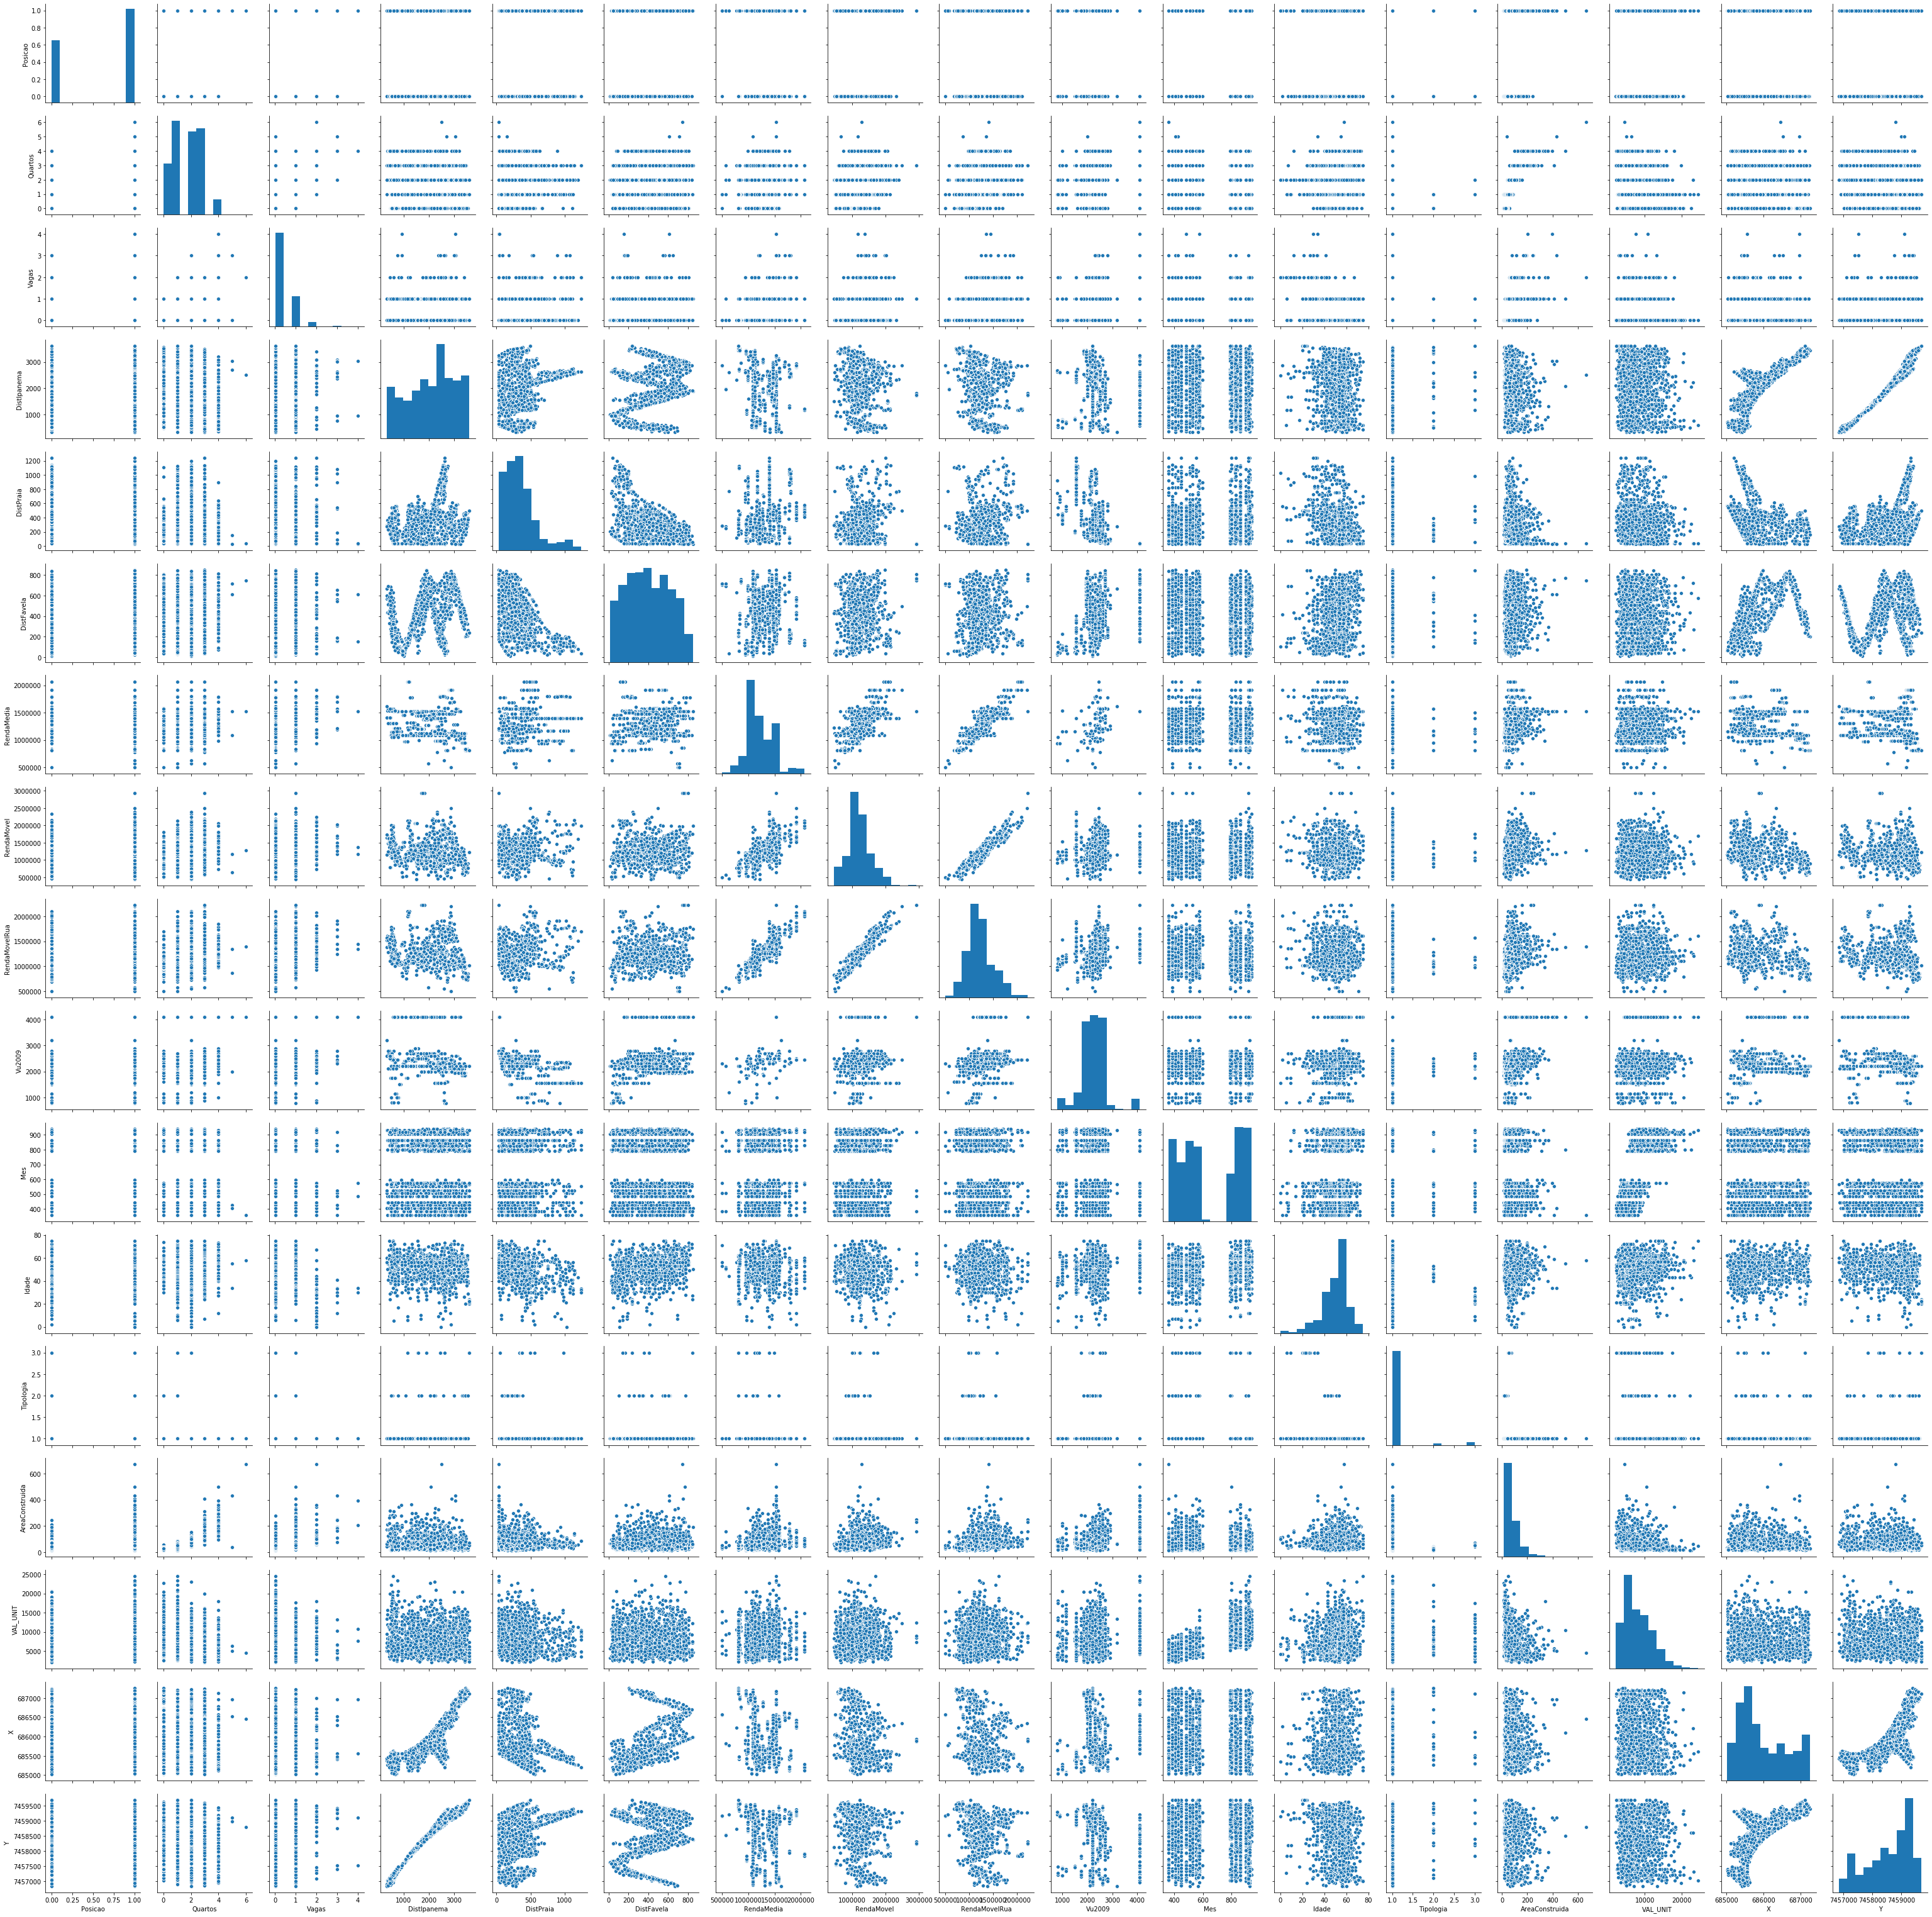

In [26]:
# Correlação entre os atributos (isso pode demorar, pois existem muitos atributos)
sns.pairplot(copacabana)
plt.show()

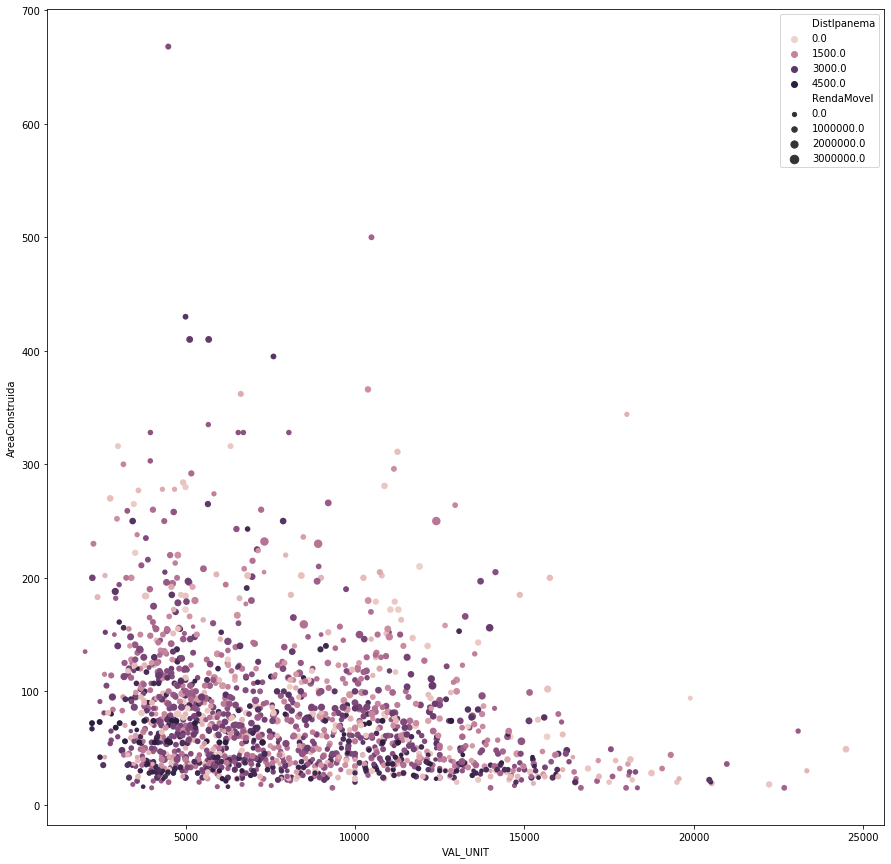

In [32]:
# Valor Unitário por area construida e por distancia de Ipanema
f, ax = plt.subplots(figsize=(15, 15))
ax1 = sns.scatterplot(x="VAL_UNIT", y="AreaConstruida",
                hue="DistIpanema", size='RendaMovel',
                linewidth=0,
                data=copacabana, ax=ax)

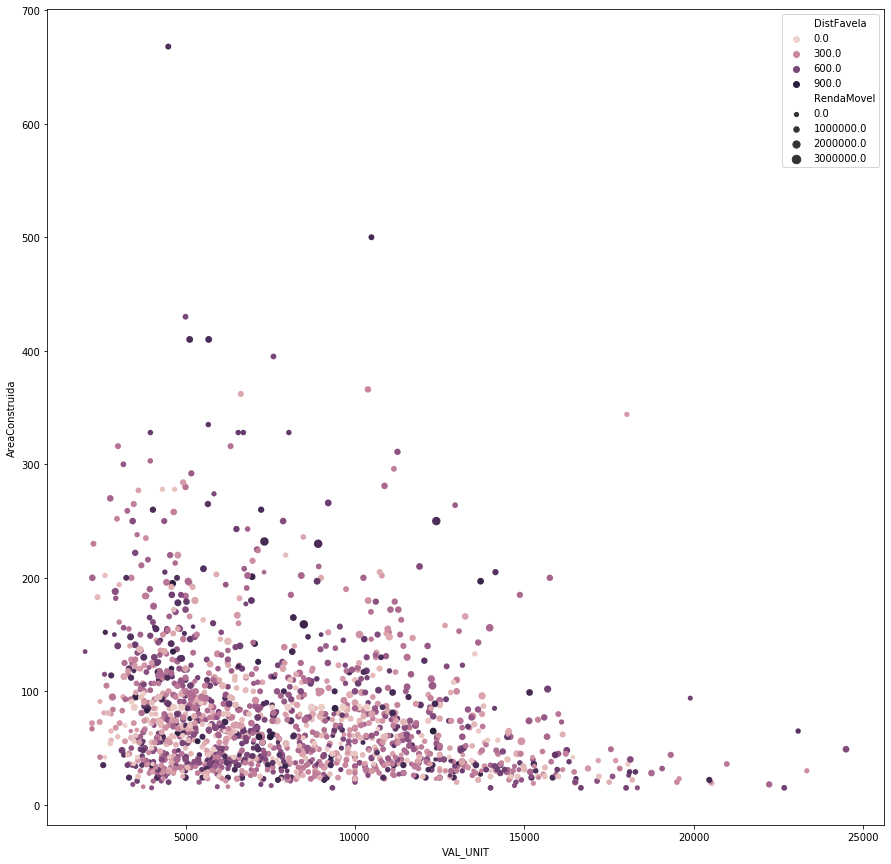

In [33]:
# Valor Unitário por area construida e por distancia da Favela
f, ax = plt.subplots(figsize=(15, 15))
ax1 = sns.scatterplot(x="VAL_UNIT", y="AreaConstruida",
                hue="DistFavela", size='RendaMovel',
                linewidth=0,
                data=copacabana, ax=ax)

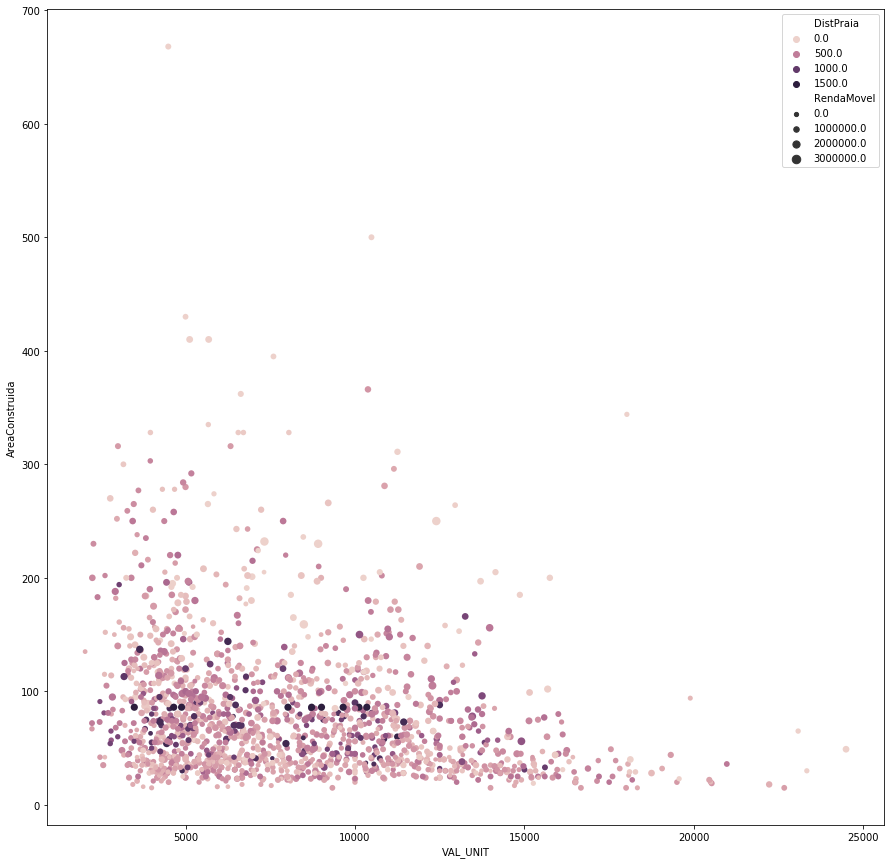

In [34]:
# Valor Unitário por area construida e por distancia da Praia
f, ax = plt.subplots(figsize=(15, 15))
ax1 = sns.scatterplot(x="VAL_UNIT", y="AreaConstruida",
                hue="DistPraia", size='RendaMovel',
                linewidth=0,
                data=copacabana, ax=ax)

## 2. Separe a feature target em um conjunto de dados separado.

In [39]:
# Separar a variavel alvo (target) do conjunto de dados
Y = copacabana['VAL_UNIT']
X = copacabana.drop('VAL_UNIT', axis=1)
feature_names = X.columns
# y = y.to_numpy()
# X = X.to_numpy()
print(X.shape, Y.shape)

(1675, 16) (1675,)


## 3. Separe agora os conjuntos em treino, validação e teste usando a proporção 70/20/10.

In [42]:
# Separar aleatoriamente 70% para treino, 20% para validacao e 10% para teste
X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y,train_size=0.7,random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp,Y_temp,train_size=0.67,random_state=42)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

(1172, 16) (1172,) (337, 16) (337,) (166, 16) (166,)


## 4. Normalize os dados

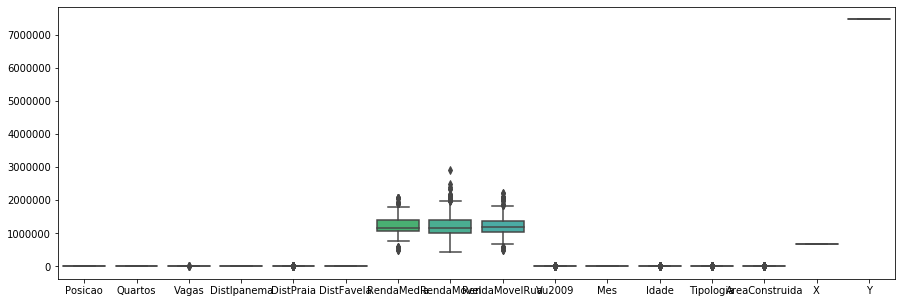

In [161]:
# Analise da grandeza dos dados
plt.figure(figsize=(15, 5))
sns.boxplot(data=X_train)
plt.show()

In [162]:
X_train.head()

Posicao Quartos Vagas  DistIpanema  DistPraia  DistFavela  RendaMedia  \
1538       0    2.00  2.00       1220.0      463.0       180.0   1189386.0   
221        0    2.00  0.01       2738.0      163.0       730.0   1083455.0   
113        1    2.00  0.01       3237.0      116.0       421.0   1083455.0   
705        1    3.00  1.00        697.0       41.0       349.0   1524600.0   
530        1    0.01  0.01        589.0       34.0       573.0   1524600.0   

      RendaMovel  RendaMovelRua  Vu2009  Mes  Idade Tipologia  AreaConstruida  \
1538   1523188.0      1356287.0  2500.0  792   33.0         1            76.0   
221     653946.0       868701.0  2000.0  792   51.0         1            61.0   
113    1035082.0      1059269.0  2000.0  904   58.0         1            50.0   
705     981332.0      1252966.0  4100.0  509   61.0         1           146.0   
530    1699814.0      1612207.0  4100.0  792   74.0         1            40.0   

              X           Y  
1538  685237.55  7457899.47  
221   686553.63  7459020.79  
113   687082.30  7459264.32  
705   685555.03  7457233.62  
530   685614.16  7457015.75

In [163]:
# transformar em numpy.array
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_val = X_val.to_numpy()
y_val = Y_val.to_numpy()
x_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

In [164]:
# índice dos atributos categóricos e numéricos
categ_atrib = [0,1,2,10,12]
num_atrib = [3,4,5,6,7,8,9,11,13,14,15]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)


#usar drop first para evitar colinearidade na regressão linear
#one-hot encoding somente nas colunas categóricas e normalização z-norm nas numéricas
# onehotencoder transforma uma coluna em uma coluna de vetores binarios
enc = ColumnTransformer([('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore',categories='auto'), 
                          categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
# nao pode fazer fit em dados de teste e validacao ********************
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15]
categóricas [0, 1, 2, 10, 12]
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               n_values=None, sparse=False),
                                 [0, 1, 2, 10, 12]),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15])],
                  verbose=True)
[ColumnTransformer] ........ (1 of 2) Process

In [165]:
# Os dados foram transformados para a mesma grandeza
pd.DataFrame(x_train).describe()

0            1            2            3            4   \
count  1172.000000  1172.000000  1172.000000  1172.000000  1172.000000   
mean      0.419795     0.580205     0.161263     0.276451     0.260239   
std       0.493736     0.493736     0.367930     0.447433     0.438952   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     1.000000     0.000000     0.000000     0.000000   
75%       1.000000     1.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                5            6            7            8            9   ...  \
count  1172.000000  1172.000000  1172.000000  1172.000000  1172.000000  ...   
mean      0.262799     0.037543     0.000853     0.000853     0.734642  ...   
std       0.440342     0.190169     0.029210     0.029210     0.441712  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     1.000000  ...   
75%       1.000000     0.000000     0.000000     0.000000     1.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

                 43            44            45            46            47  \
count  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03   
mean   7.275182e-17 -1.667229e-17 -1.227687e-16  2.516000e-16  3.952091e-16   
std    1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00   
min   -1.341721e+00 -1.804396e+00 -2.946567e+00 -2.228721e+00 -2.665064e+00   
25%   -7.276975e-01 -8.174288e-01 -6.075662e-01 -5.967534e-01 -6.377751e-01   
50%   -1.385672e-01 -8.209689e-03 -2.785828e-01 -1.223456e-01 -1.320534e-01   
75%    4.505630e-01  7.787910e-01  6.499654e-01  5.284325e-01  5.235698e-01   
max    3.682482e+00  2.082663e+00  3.330487e+00  4.926032e+00  3.659303e+00   

                 48            49            50            51            52  
count  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03  
mean   1.940048e-16  3.440555e-16  1.091277e-16  2.413996e-14 -1.289102e-12  
std    1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00  
min   -2.870563e+00 -4.318958e+00 -1.067295e+00 -1.504297e+00 -2.321118e+00  
25%   -4.825218e-01 -5.328560e-01 -6.751779e-01 -7.965418e-01 -7.337307e-01  
50%   -9.103965e-02  2.417501e-01 -2.319156e-01 -2.894211e-01  2.901561e-01  
75%    4.961836e-01  6.720868e-01  3.179002e-01  7.945826e-01  8.604910e-01  
max    3.628041e+00  2.135231e+00  1.006541e+01  1.986900e+00  1.476702e+00  

[8 rows x 53 columns]

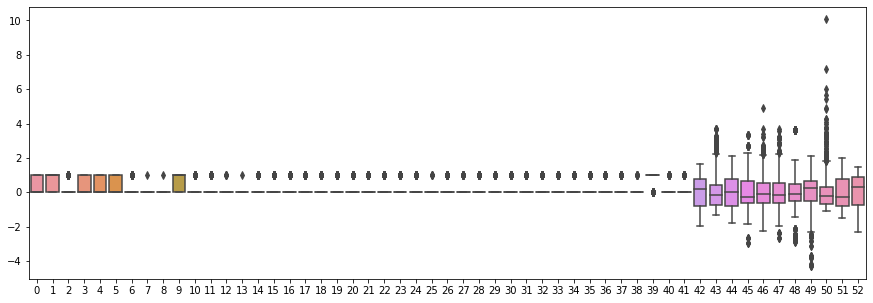

In [166]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=x_train)
plt.show()

## 5. Execute uma regressão linear com todas as features.

In [168]:
# Criar o objeto de regressão linear
regr = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treino com as features e o target
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 6. Faça a predição sobre o conjunto de testes.

In [169]:
# Fazer as predições usando o conjunto de validação
yb_pred = regr.predict(x_val)

## 7. Calcule o Erro Médio Quadrático MAE e o Coeficiente de Determinação R2 
## Explique cada um.

In [170]:
# Mostra os coeficientes
print('Coeficientes: \n', regr.coef_)
# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, yb_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita  yval:valor real ybpred valor preditor
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, yb_pred))

Coeficientes: 
 [ 2.97542796e+15  2.97542796e+15 -6.63052753e+15 -6.63052753e+15
 -6.63052753e+15 -6.63052753e+15 -6.63052753e+15 -6.63052753e+15
 -6.63052753e+15 -5.06041656e+15 -5.06041656e+15 -5.06041656e+15
 -5.06041656e+15 -5.06041656e+15  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14  6.66747373e+14
  6.66747373e+14  6.66747373e+14  6.66747373e+14 -8.39183278e+12
 -8.39183278e+12 -8.39183278e+12  5.21678223e+03  2.13332303e+02
  2.81018401e+02  4.77284775e+07  6.61262630e+07 -1.04090319e+08
  6.71511945e+02  2.74639330e+01 -1.19905555e+03 -1.28208640e+03
 -4.65207574e+03]
Mean squared error: 3957612.4095
Coeficiente de Determinação: 0.7111


#### Explicação: O Mean Squared Error (conhecido como erro quadratico médio) é a diferença onde os pontos se situam  com relação a o que foi predito, ou seja quão distante o ponto previsto está do ponto. O Coeficiente de determinação descreve o quão adequado o modelo de regressão linear está em relação aos valores observados, vale ressaltar que o valor deve estar entre 0 e 1 onde mais aproximado de 1 é adequado.

## 8. Plote as predições em validação.

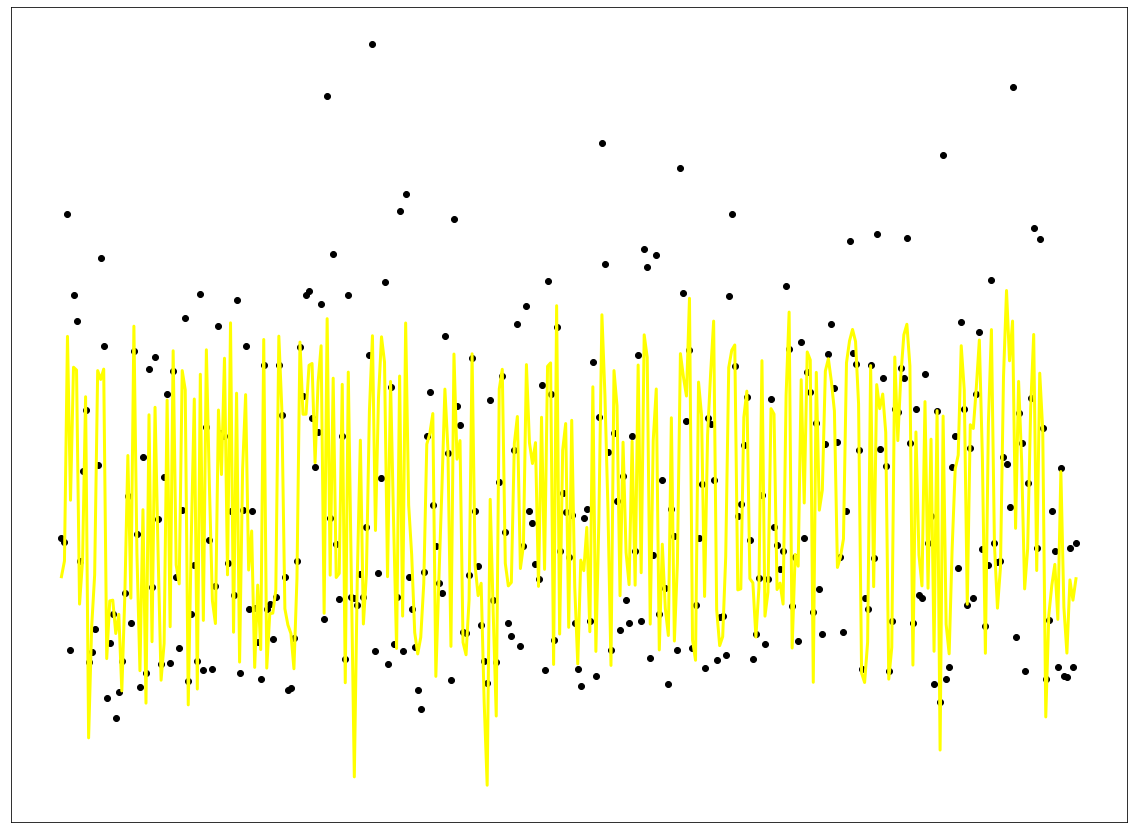

In [171]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, y_val,  color='black')
plt.plot(x, yb_pred, color='yellow', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [172]:
# teste modelo
regrp_pred_teste = regr.predict(x_test)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, regrp_pred_teste))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_test, regrp_pred_teste))

Mean squared error: 3649454.8916
Coeficiente de Determinação: 0.7496


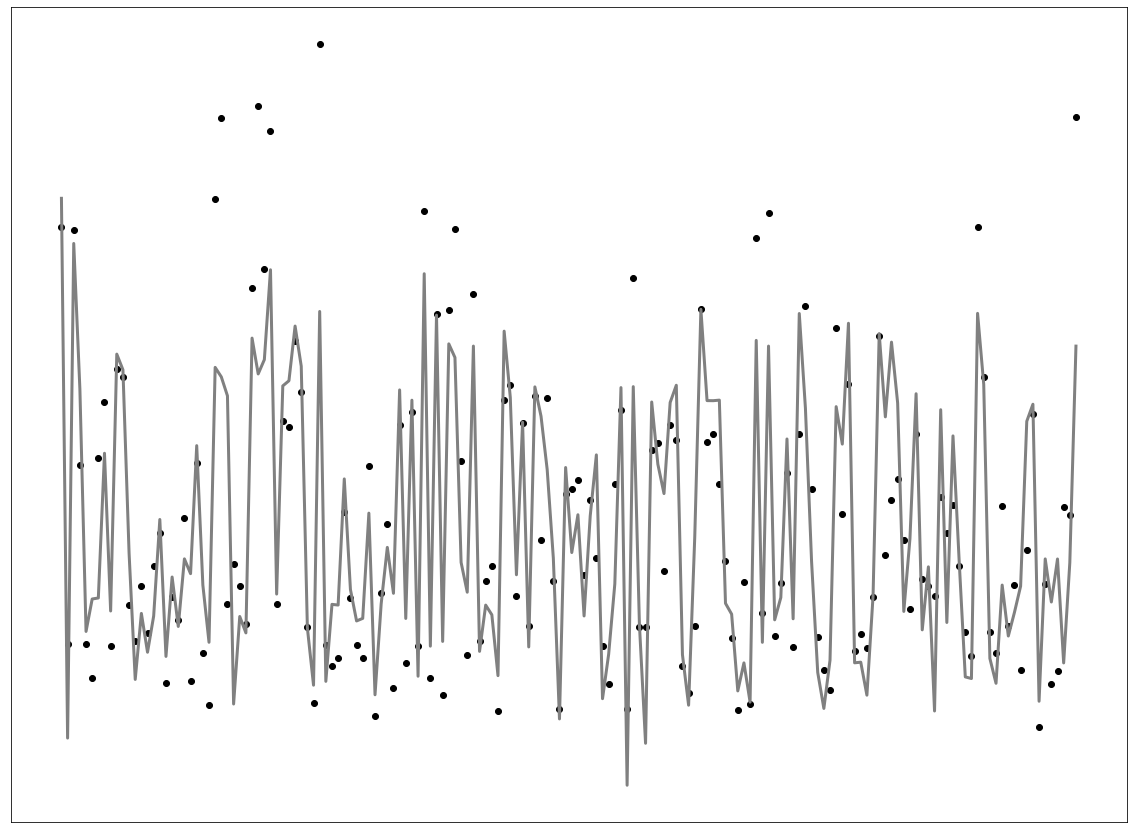

In [173]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_test)))
plt.scatter(x, y_test,  color='black')
plt.plot(x, regrp_pred_teste, color='grey', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 9. Analise novamente os dados e remova as features que você acha que não estão agregando muita informação ao modelo. Faça uma análise de correlações para ajudar nas remoções.

In [174]:
# Remover Quartos, Tipologia, Vagas, Posicao
x_train = X_train.drop(['Quartos','Tipologia', 'Vagas','Posicao'], axis=1).to_numpy()
x_val = X_val.drop(['Quartos','Tipologia', 'Vagas','Posicao'], axis=1).to_numpy()
x_test = X_test.drop(['Quartos','Tipologia', 'Vagas','Posicao'], axis=1).to_numpy()
print(x_train.shape, y_train.shape)

(1172, 12) (1172,)


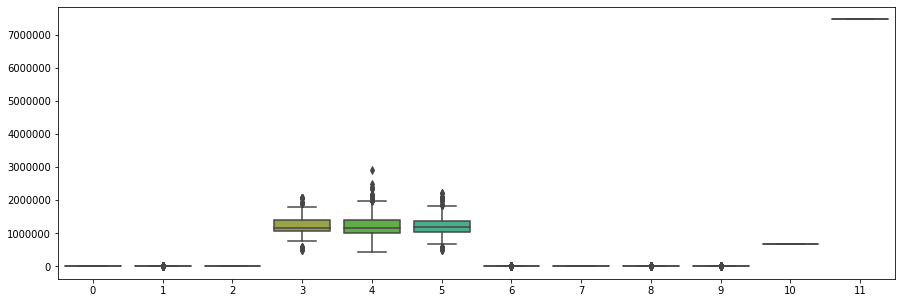

In [175]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=x_train)
plt.show()

## 10. Execute novamente os passos de 4 a 8, agora com o conjunto de dados reduzidos.

In [176]:
# índice dos atributos categóricos e numéricos
categ_atrib = []
num_atrib = [0,1,2,3,4,5,6,7,8,9,10]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)

#fazer one-hot encoding da feature bairro; 
#usar drop first para evitar colinearidade na regressão linear
#one-hot encoding somente nas colunas categóricas e normalização z-norm nas numéricas
enc = ColumnTransformer([('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore'), categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
categóricas []
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('onehot',
                                 OneHotEncoder(categorical_features=None,
                                               categories=None, drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               n_values=None, sparse=False),
                                 []),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])],
                  verbose=True)
[ColumnTransformer] ........ (1 of 1) Processing z-norm, total=   0.0s
(1172, 11)
(

In [142]:
pd.DataFrame(x_train).describe()

0             1             2             3             4   \
count  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03   
mean   1.758169e-16  7.275182e-17 -1.667229e-17 -1.227687e-16  2.516000e-16   
std    1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00   
min   -1.966369e+00 -1.341721e+00 -1.804396e+00 -2.946567e+00 -2.228721e+00   
25%   -7.876445e-01 -7.276975e-01 -8.174288e-01 -6.075662e-01 -5.967534e-01   
50%    1.605076e-01 -1.385672e-01 -8.209689e-03 -2.785828e-01 -1.223456e-01   
75%    7.798606e-01  4.505630e-01  7.787910e-01  6.499654e-01  5.284325e-01   
max    1.636939e+00  3.682482e+00  2.082663e+00  3.330487e+00  4.926032e+00   

                 5             6             7             8             9   \
count  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03  1.172000e+03   
mean   3.952091e-16  1.940048e-16 -1.864265e-16  3.440555e-16  1.091277e-16   
std    1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00  1.000427e+00   
min   -2.665064e+00 -2.870563e+00 -1.421290e+00 -4.318958e+00 -1.067295e+00   
25%   -6.377751e-01 -4.825218e-01 -1.003323e+00 -5.328560e-01 -6.751779e-01   
50%   -1.320534e-01 -9.103965e-02 -3.739133e-01  2.417501e-01 -2.319156e-01   
75%    5.235698e-01  4.961836e-01  1.047175e+00  6.720868e-01  3.179002e-01   
max    3.659303e+00  3.628041e+00  1.430722e+00  2.135231e+00  1.006541e+01   

                 10  
count  1.172000e+03  
mean   2.413996e-14  
std    1.000427e+00  
min   -1.504297e+00  
25%   -7.965418e-01  
50%   -2.894211e-01  
75%    7.945826e-01  
max    1.986900e+00

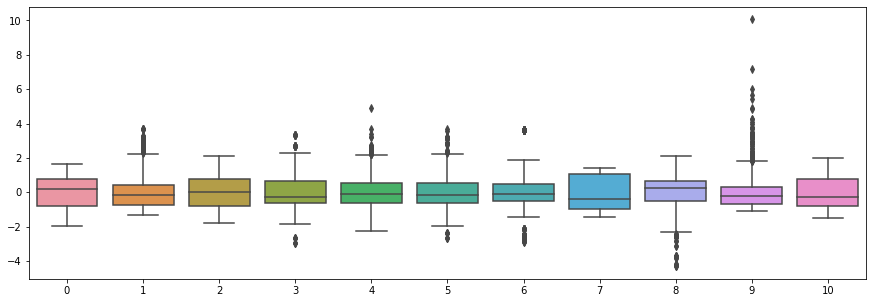

In [177]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=x_train)
plt.show()

In [178]:
# Criar o objeto de regressão linear
regrp = linear_model.LinearRegression()

# Treinar o modelo usando os conjuntos de treino com as features e o target
regrp.fit(x_train, y_train)

# Fazer as predições usando o conjunto de validaçao
yp_pred = regrp.predict(x_val)

In [179]:
# Mostra os coeficientes
print('Coeficientes: \n', regrp.coef_)
# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, yp_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, yp_pred))

Coeficientes: 
 [-1.22526959e+03  4.66860004e+02  1.64688831e+02  5.07641565e+07
  7.03320553e+07 -1.10710809e+08  7.03522893e+02  2.85847456e+03
 -9.50105600e+01 -1.02493293e+03  9.37390585e+02]
Mean squared error: 4123498.7311
Coeficiente de Determinação: 0.6990


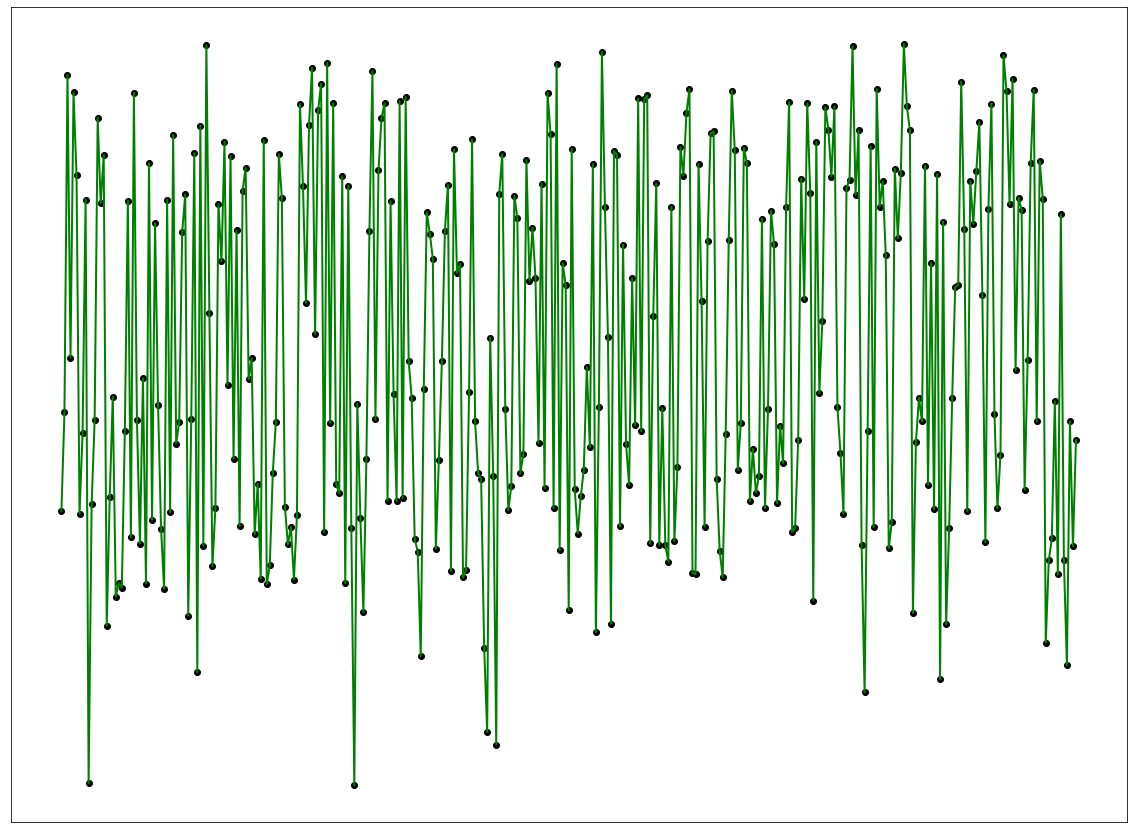

In [180]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, yp_pred,  color='black')
plt.plot(x, yp_pred, color='green', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [181]:
# teste modelo
regrp2_pred_teste = regrp.predict(x_test)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, regrp2_pred_teste))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_test, regrp2_pred_teste))

Mean squared error: 3862104.2431
Coeficiente de Determinação: 0.7350


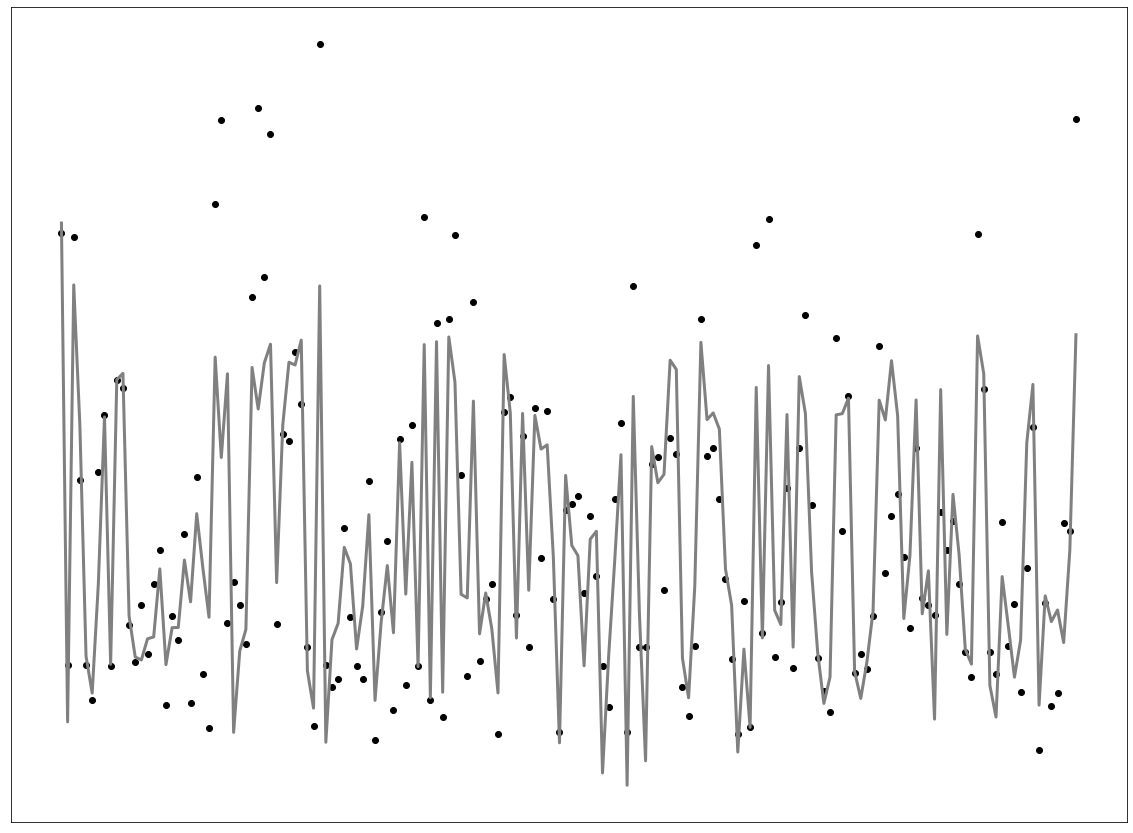

In [183]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_test)))
plt.scatter(x, y_test,  color='black')
plt.plot(x, regrp2_pred_teste, color='grey', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 11. Escolha um modelo dos Ensembles do Scikit-Learn.

### Utilização do modelo GradientBoosting estudado em aula

In [185]:
# transformar em numpy.array
x_train = X_train.to_numpy()
y_train = Y_train.to_numpy()
x_val = X_val.to_numpy()
y_val = Y_val.to_numpy()
x_test = X_test.to_numpy()
y_test = Y_test.to_numpy()

In [186]:
# índice dos atributos categóricos e numéricos
categ_atrib = [0,1,2,10,12]
num_atrib = [3,4,5,6,7,8,9,11,13,14,15]
print('numéricas', num_atrib)
print('categóricas', categ_atrib)

#normalização z-norm nas numéricas
# ordinal encoder é baseado em arvores e faz uma coluna ainda nao precisa quebrar em varias binarias
enc = ColumnTransformer([('ordinal',OrdinalEncoder(categories='auto'), categ_atrib),
                         ('z-norm',StandardScaler(), num_atrib)], verbose=True)

print(enc)
x_train = enc.fit_transform(x_train)
x_val = enc.transform(x_val)
x_test = enc.transform(x_test)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

numéricas [3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15]
categóricas [0, 1, 2, 10, 12]
ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories='auto',
                                                dtype=<class 'numpy.float64'>),
                                 [0, 1, 2, 10, 12]),
                                ('z-norm',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 [3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15])],
                  verbose=True)
[ColumnTransformer] ....... (1 of 2) Processing ordinal, total=   0.0s
[ColumnTransformer] ........ (2 of 2) Processing z-norm, total=   0.0s
(1172, 16)
(337, 16)
(166, 16)


In [187]:
# #############################################################################
# Fit regression model
params = {'n_estimators': 5000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(x_train, y_train)

ygbr_pred = clf.predict(x_val)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_val, ygbr_pred))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_val, ygbr_pred))

Mean squared error: 4248176.1698
Coeficiente de Determinação: 0.6899


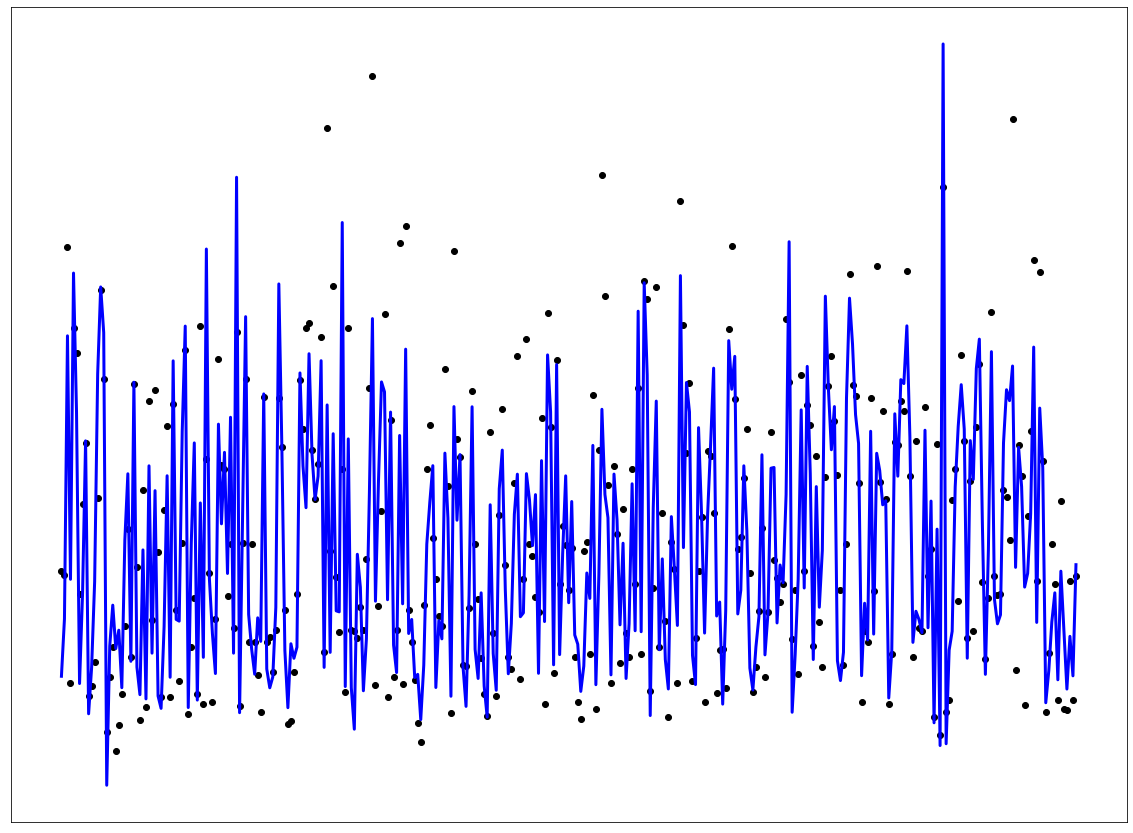

In [188]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_val)))
plt.scatter(x, y_val,  color='black')
plt.plot(x, ygbr_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [189]:
# teste do melhor modelo
ygbr_pred_teste = clf.predict(x_test)

# Mostra o erro quadrado médio
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, ygbr_pred_teste))
# Coeficiente de Determinação Rˆ2 - r ao quadrado: 1 é a previsão perfeita
print('Coeficiente de Determinação: %.4f' % r2_score(y_test, ygbr_pred_teste))

Mean squared error: 3644373.7119
Coeficiente de Determinação: 0.7499


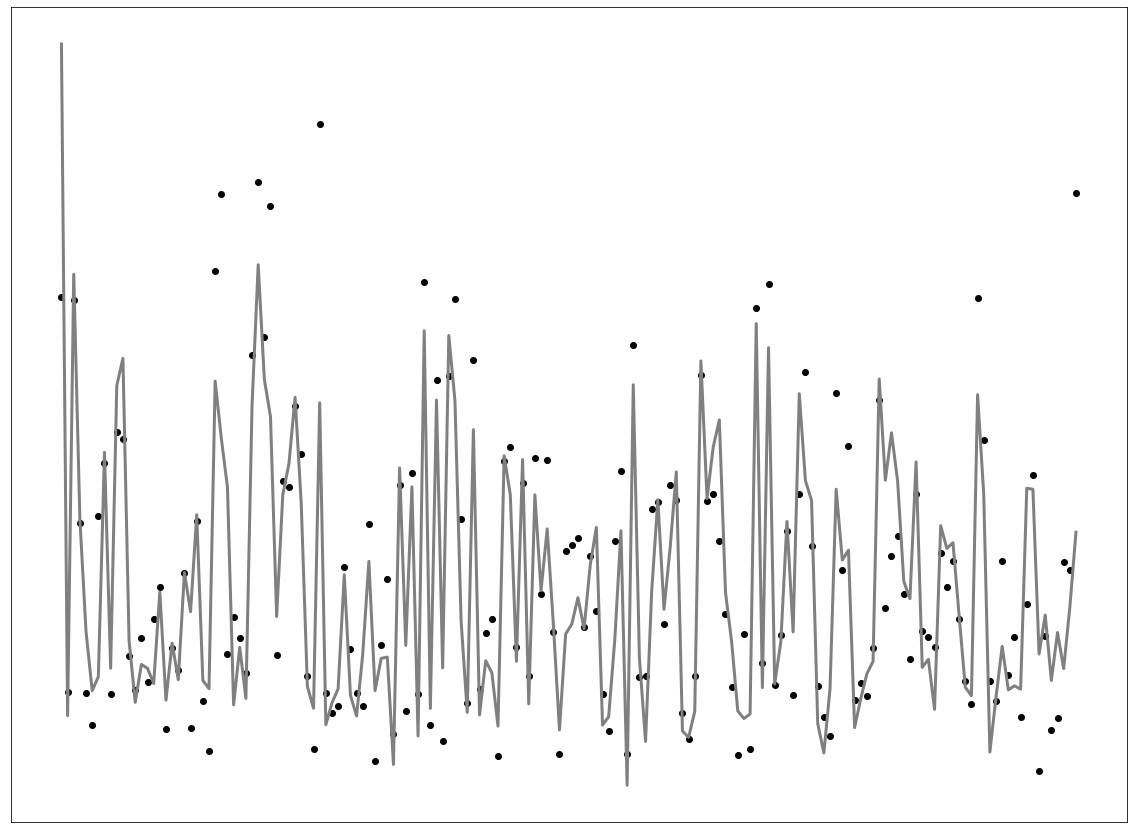

In [190]:
# Plota a saída
plt.figure(figsize=(20, 15))
x = list(range(len(x_test)))
plt.scatter(x, y_test,  color='black')
plt.plot(x, ygbr_pred_teste, color='grey', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, 'Deviance')

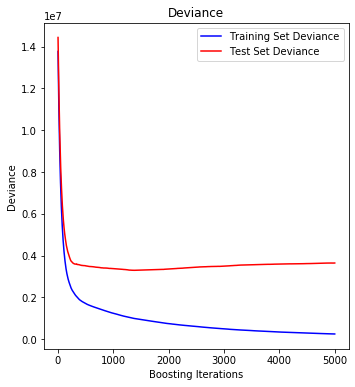

In [191]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, ygbr_pred_teste in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test, ygbr_pred_teste)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

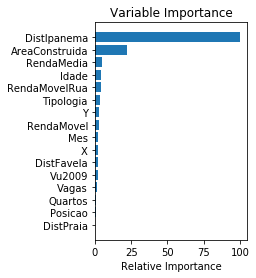

In [192]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Conclusão

### O melhor modelo deste caso foi o GradientBoosting, que apesar de ter tido um R2 de 0.68 nas validações comparado ao 0.71 de regressão linear sem a retirada dos valores. O modelo GradientBoosting conseguiu um R2 de 0.7499 nos testes comparado ao de regressão linear também, ou seja, obteve a maior quantidade de acertos. E além disso teve o menor MAE também. Com relação a diminuição das features categoricas, o modelo perdeu a qualidade em acertos reduzindo de  0.7496 para 0.6990, ou seja, 5.06%

## 14. Qual é a feature que mais estava prejudicando os resultados?

#### Na verdade as features de rendas estavam bastante divergentes dos demais valores, o que necessitou a normalização do conjunto de dados, uma feature que achei destecessária foi o mes, pois eram valores que, ao meu ver, em momento algum não tinham correlação com o preço unitario.
